In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
os.getcwd()

'C:\\Users\\HP-888'

In [5]:
os.chdir(work_dir)

In [6]:
nodes = pd.read_csv(os.path.join(work_dir, 'nodes.txt'), sep="\t", header=None)

In [7]:
nodes.columns = ['number', 'blog_name', 'label', 'source']

In [8]:
nodes.shape

(1490, 4)

### Nodes df

In [9]:
nodes.head(10)

,number,blog_name,label,source
0,1,100monkeystyping.com,0,Blogarama
1,2,12thharmonic.com/wordpress,0,BlogCatalog
2,3,40ozblog.blogspot.com,0,"Blogarama,BlogCatalog"
3,4,4lina.tblog.com,0,Blogarama
4,5,750volts.blogspot.com,0,Blogarama
5,6,95theses.blogspot.com,0,Blogarama
6,7,abbadabbaduo.blogspot.com,0,"Blogarama,LeftyDirectory"
7,8,aboutpolitics.blogspot.com,0,"Blogarama,eTalkingHead"
8,9,achingandspinning.blogspot.com,0,Blogarama
9,10,ackackack.com,0,BlogCatalog


In [10]:
# true_labels percentage

true_labels = nodes.label[nodes.label==1].count()
false_labels = nodes.label[nodes.label==0].count()

print(true_labels, false_labels)


true_percent = true_labels / (true_labels+false_labels)
false_percent = false_labels / (true_labels+false_labels)

print(true_percent, false_percent)

732 758
0.4912751677852349 0.508724832214765


## Read edges file and take a look at the output

In [11]:
edges = pd.read_csv(os.path.join(work_dir, 'edges.txt'), sep="\t", header=None)

In [12]:
edges.shape

(19090, 2)

In [13]:
edges.head(30)

,0,1
0,267,1394
1,267,483
2,267,1051
3,904,1479
4,904,919
5,904,1045
6,904,1330
7,904,1108
8,904,995
9,904,963


In [14]:
edge_list = edges.to_numpy()

In [17]:
total_edges = pd.concat([edges[0], edges[1]])


In [18]:
len(total_edges)
#total_edges.head(10)

38180

Finding all unique values having connections. Also has index_list will show us the way to true_value of 0 or 1 for particular edge number.

In [20]:
# тут лежит преобразование индексов. в дальнейшем вычисляем матрицы по индексам данной таблицы, от 0 до 1224
# index_list will show us the way to true_value of 0 or 1 for particular edge number.

unique_edges = total_edges.drop_duplicates()

index_dict = sorted(unique_edges)

In [21]:
# # считает сколько коннектов имеет узел
# count = 0
# for edge in total_edges:
#     if edge == index_dict[1222]:
#         count += 1
# print(count)

### Вот тут собсно словарь из последовательных значений, коих у нас 1224, в изначальные, в диапазоне [0:1490]

In [22]:
len(index_dict)

1224

In [23]:
unique_connected_nodes = len(unique_edges)

In [24]:
unique_connected_nodes

1224

In [25]:
# Count unique walues in edges list shows 1224 unique values. Then we make a double check 

## Remove isolated nodes

This is a double check for unique nodes number. 1224, confirmed

In [27]:
nodes.head(10)

,number,blog_name,label,source
0,1,100monkeystyping.com,0,Blogarama
1,2,12thharmonic.com/wordpress,0,BlogCatalog
2,3,40ozblog.blogspot.com,0,"Blogarama,BlogCatalog"
3,4,4lina.tblog.com,0,Blogarama
4,5,750volts.blogspot.com,0,Blogarama
5,6,95theses.blogspot.com,0,Blogarama
6,7,abbadabbaduo.blogspot.com,0,"Blogarama,LeftyDirectory"
7,8,aboutpolitics.blogspot.com,0,"Blogarama,eTalkingHead"
8,9,achingandspinning.blogspot.com,0,Blogarama
9,10,ackackack.com,0,BlogCatalog


In [28]:
# We will take true_values out of this later
nodes_dict = dict(nodes)

In [29]:
nodes_cleaned = nodes.loc[nodes.number.isin(total_edges)]

In [30]:
nodes_cleaned.shape

(1224, 4)

# Start to build matrices

Create adjacency matrix

In [31]:
adj_matrix = pd.DataFrame(np.zeros(shape=(unique_connected_nodes, unique_connected_nodes)))

In [32]:
adj_matrix.shape

(1224, 1224)

In [33]:
adj_matrix.astype('int64')

,0,1,2,3,4,5,6,7,8,9,...,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Щас будет немного сложна

In [34]:
for index, row in edges.iterrows():
    adj_matrix[index_dict.index(row[0])][index_dict.index(row[1])] = 1 # тут транслируем связи в [0:1489] to [0:1223]

In [35]:
for index, row in edges.iterrows():
    adj_matrix[index_dict.index(row[1])][index_dict.index(row[0])] = 1

In [36]:
adj_matrix = adj_matrix.astype('int64')

In [37]:
adj_matrix

,0,1,2,3,4,5,6,7,8,9,...,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


D matrix

In [38]:
degree = adj_matrix.sum(axis=0)

In [39]:
degree_matrix = np.diag(degree)

In [40]:
degree_matrix = degree_matrix.astype('int64')

In [41]:
degree_matrix

array([[26,  0,  0, ...,  0,  0,  0],
       [ 0, 45,  0, ...,  0,  0,  0],
       [ 0,  0,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0, 18,  0],
       [ 0,  0,  0, ...,  0,  0,  1]], dtype=int64)

In [42]:
degree_matrix = pd.DataFrame(degree_matrix)

L matrix

In [43]:
laplacian = degree_matrix - adj_matrix

In [44]:
laplacian

,0,1,2,3,4,5,6,7,8,9,...,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223
0,26,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,0,0,0
1221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1,0
1222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,18,0


### Finding eigenvectors and eigenvalues

In [45]:
eigval, eigvect = np.linalg.eigh(laplacian)

In [46]:
print("Eigenvalues")
print(eigval)

Eigenvalues
[-7.91383414e-15  4.56532373e-14  1.68691508e-01 ...  3.02030798e+02
  3.07129990e+02  3.52045712e+02]


In [47]:
print("Eigenvectors")
print(eigvect)

Eigenvectors
[[-9.71548604e-21 -2.86064784e-02  1.58866314e-03 ...  4.69059623e-05
  -1.50028327e-04  2.86881278e-03]
 [ 1.46045467e-16 -2.86064784e-02  1.59180448e-03 ...  3.75933956e-05
  -2.04648011e-04  2.90496915e-03]
 [-4.90174484e-16 -2.86064784e-02  1.72488028e-03 ... -1.86848086e-05
  -4.60539729e-05 -1.48941553e-05]
 ...
 [-1.10366380e-16 -2.86064784e-02  1.88647150e-03 ... -1.11631244e-05
  -5.99068988e-07 -3.04397639e-08]
 [-5.06875945e-17 -2.86064784e-02  1.56823977e-03 ...  3.36044426e-03
   1.83392984e-04  1.06857486e-05]
 [ 3.67425985e-16 -2.86064784e-02  1.91584569e-03 ...  1.05672450e-06
   1.04750618e-06  1.67197840e-07]]


In [48]:
eigenvcts_norms = np.apply_along_axis(lambda v: np.linalg.norm(v, ord=2), axis=0, arr=eigvect)

In [49]:
print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 0.9999999999999989
Max Norm: 1.000000000000001


In [50]:
eigval_sorted_indices = np.argsort(eigval)
eigval_sorted = eigval[eigval_sorted_indices]

In [51]:
eigval_sorted[:20]

array([-7.91383414e-15,  4.56532373e-14,  1.68691508e-01,  2.99546622e-01,
        3.75763683e-01,  3.79187347e-01,  5.81772646e-01,  5.85516914e-01,
        6.51220523e-01,  6.93583769e-01,  7.48161561e-01,  7.52969430e-01,
        8.05460404e-01,  8.36420323e-01,  8.51735710e-01,  8.79866024e-01,
        8.87368655e-01,  8.95060445e-01,  9.04952799e-01,  9.09803526e-01])

In [52]:
eigval_sorted_indices[:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [53]:
from matplotlib import pyplot as plt

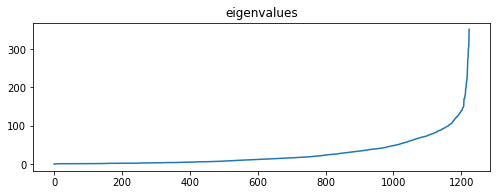

In [54]:
fig = plt.figure(figsize=[18, 6])

ax1 = plt.subplot(221)
plt.plot(eigval_sorted)
ax1.title.set_text('eigenvalues')

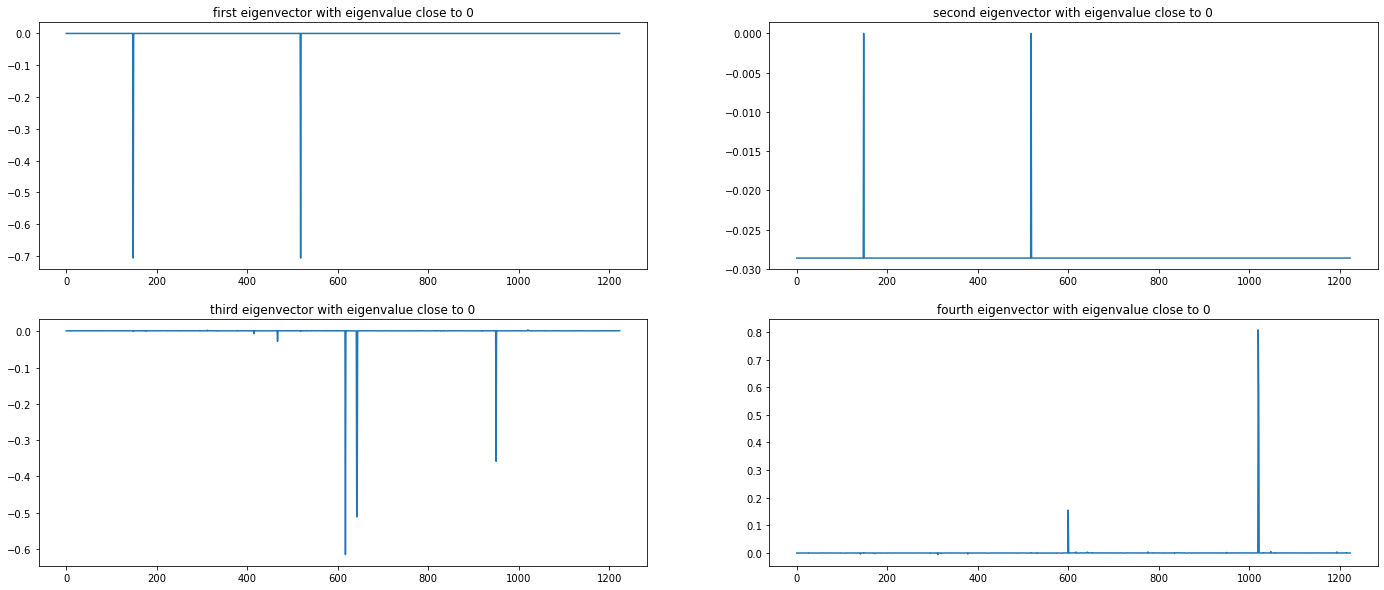

In [55]:
fig2 = plt.figure(figsize=[24, 10])

ax1 = plt.subplot(221)
plt.plot(eigvect[:, eigval_sorted_indices[0]])
ax1.title.set_text('first eigenvector with eigenvalue close to 0')

ax2 = plt.subplot(222)
plt.plot(eigvect[:, eigval_sorted_indices[1]])
ax2.title.set_text('second eigenvector with eigenvalue close to 0')

ax3 = plt.subplot(223)
plt.plot(eigvect[:, eigval_sorted_indices[2]])
ax3.title.set_text('third eigenvector with eigenvalue close to 0')

ax4 = plt.subplot(224)
plt.plot(eigvect[:, eigval_sorted_indices[3]])
ax4.title.set_text('fourth eigenvector with eigenvalue close to 0')

In [474]:
eigvect.shape

(1224, 1224)

## Run K-means clustering

In [62]:
from sklearn.cluster import KMeans

In [618]:
df_vect = pd.concat([pd.DataFrame(eigvect[:, 0:600]), pd.DataFrame(eigvect[:, 601:1200])], axis=1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_vect)
colors = kmeans.labels_
colors.sum()

972

In [621]:
cluster_1 = []
cluster_2 = []

for i, n in enumerate(colors):
    if n == 1:
        cluster_1.append(i)
    else:
        cluster_2.append(i)
        
print("\n\nClustering results:")
print("\ncluster 1: {}".format(cluster_1))
print("\ncluster 2: {}".format(cluster_2))



Clustering results:

cluster 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 220, 22